<a href="https://colab.research.google.com/github/Hohartt/s/blob/master/tf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pathlib

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data") #url을 통해 받아오기 


32768/30286 [================================] - 0s 2us/step


In [5]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
len(column_names) # pandas에 쓸 column name들이다. 

8

In [6]:
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = '?', comment='\t', sep=" ", skipinitialspace = True) 
# 이런건 데이터의 형태를 살펴보고 지정함. 
#delimeter = 열을 구분할 것. 여기서는 일단 안씀. sep과 같음. 아마 버젼이 변하면서 이름을 바꾼듯?
#names = : 칼럼을 넣고 싶을때 사용. 
#encoding = 'UTF8' 이런식으로 넣어줄 수도 있음. euc-kr과 구분해서 둘중 오류 안나는거 사용 나중에 한국어로 할 때. 
#nav_values = '?' : '?'라는 걸 string으로 인식하지못하게. 이것은 결측값임. 
#이 파일은 sep(구분자) 가 공백. 따라서 " " 
#comment : 이 단일문자를 포함한 열(이걸로 시작하는 열 )은 분석하지말아야 한다는거. 
#skipinitial space : delimeter후에 공백 skip할거냐 뭐 그런거인듯? 

In [60]:
data_df = raw_dataset.copy()

In [61]:
data_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [62]:
data_df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [63]:
data_df.isna().sum() # isna : 결측값이면 1로만드는듯. 어디에 몇개있는지 세본거임. 

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [64]:
data_df = data_df.dropna()

In [65]:
data_df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [66]:
origin = data_df.pop('Origin') # pop하는 순간 원본데이터에서 없어진다는 것 명심. 

In [67]:
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [68]:
data_df['USA'] = (origin==1)*1.0 # 파이썬은 참 많은것을 가능하게 한다. 
data_df['Europe'] = (origin == 2)*1.0
data_df['Japan'] = (origin ==3 )*1.0 

# pandas는 data_df['key'] = value이런식으로 열을 새로 만들 수 있음. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [69]:
data_df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


In [70]:
train_dataset = data_df.sample(frac = 0.8, random_state = 0) #Return a random sample of items from an axis of object.You can use random_state for reproducibility.
test_dataset = data_df.drop(train_dataset.index)# 위의 train_dataset으로 사용할 것들은 제거. 
print(f"train data sample : {len(train_dataset)}, test data sample : {len(test_dataset)}")

train data sample : 314, test data sample : 78


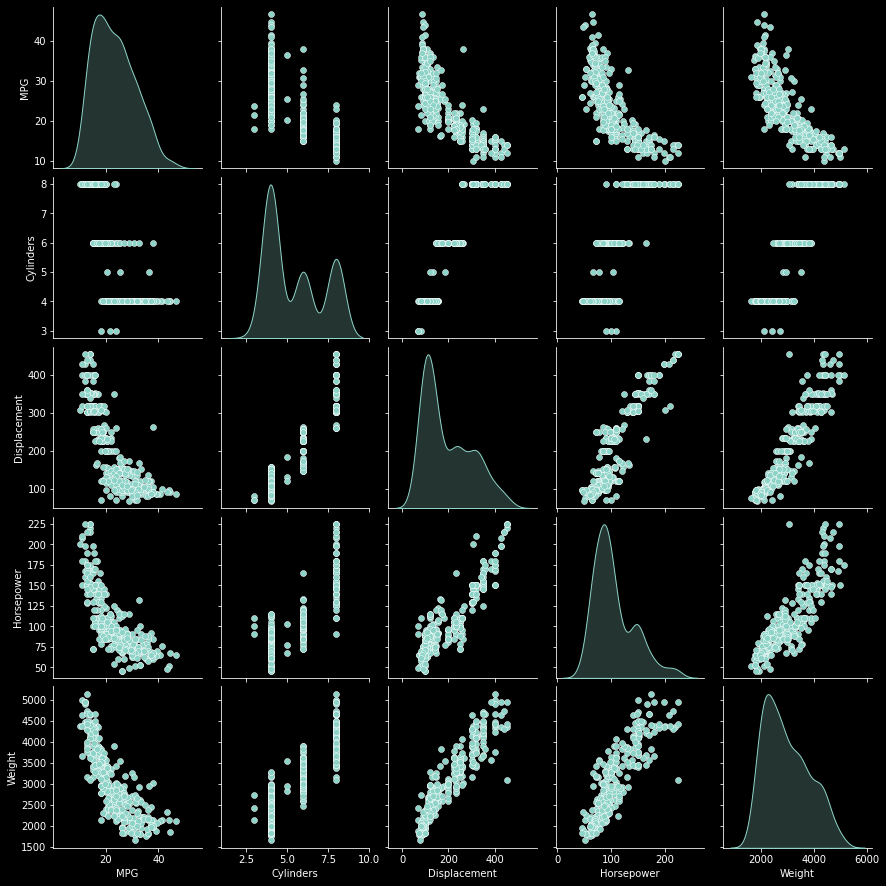

In [71]:
plt.style.use('dark_background')
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight']],diag_kind='kde')

In [72]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop("MPG")



In [73]:
def norm(x):
  return((x- train_stats['mean']) / train_stats['std'])

In [74]:
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [75]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


In [76]:

class_num = len(normed_train_data.keys())
normed_train_data.head()
print(class_num)

9


In [77]:
def model_ops():
  model = keras.Sequential([
      #activation func : 1.relu 2. sigmoid
      layers.Dense(128, activation = 'relu', input_shape =[class_num]),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(1)

  ])

  loss_fn = tf.keras.losses.mean_squared_error
  optim = tf.keras.optimizers.Adam(1e-3)
  model.compile(loss=  loss_fn, optimizer = optim, metrics =['mse','mae']) # 출력할 열 두개준듯?

  return model

In [78]:
net = model_ops()
net.summary()
#파라미터 수 : 첫번째 : input 인 9개 > 128 개  : 9x128 그리고 bias 128개. 
              #두번째 : 128x128+128  = 16512
              #마지막 : 128x1 + 1  = 129개 


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1280      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 17,921
Trainable params: 17,921
Non-trainable params: 0
_________________________________________________________________


In [79]:
temp_batch = normed_test_data[:20]
temp_result = net.predict(temp_batch)
print(temp_result)

[[-0.08483329]
 [ 0.07960093]
 [ 0.21958739]
 [ 0.4604194 ]
 [ 0.09887919]
 [ 0.16798939]
 [ 0.20932525]
 [ 0.219091  ]
 [ 0.08966591]
 [ 0.38626248]
 [ 0.03662409]
 [ 0.43251505]
 [ 0.21877524]
 [ 0.03301267]
 [ 0.10927742]
 [ 0.19712116]
 [ 0.09888788]
 [ 0.17321455]
 [ 0.06407066]
 [ 0.08969084]]


In [80]:
total_epochs = 500
hist = net.fit(normed_train_data, train_labels, epochs = total_epochs, validation_split =   0.1)#validation_split : train_data중에 얼마만큼을 validation data로 사용할 것인지.
#자꾸 결과 이상하게 나왔던이유 : 결측값 drop안시켜서. 이것도 중요하다! 


Epoch 1/500
9/9 [==============================] - 0s 16ms/step - loss: 559.3198 - mse: 559.3198 - mae: 22.4554 - val_loss: 521.4986 - val_mse: 521.4986 - val_mae: 21.3181
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 481.9969 - mse: 481.9969 - mae: 20.7327 - val_loss: 424.0209 - val_mse: 424.0209 - val_mae: 19.0877
Epoch 3/500
9/9 [==============================] - 0s 4ms/step - loss: 377.6758 - mse: 377.6758 - mae: 18.2186 - val_loss: 297.7235 - val_mse: 297.7235 - val_mae: 15.7729
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 248.1373 - mse: 248.1373 - mae: 14.4502 - val_loss: 162.6832 - val_mse: 162.6832 - val_mae: 11.2102
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 129.6736 - mse: 129.6736 - mae: 9.7755 - val_loss: 66.9220 - val_mse: 66.9220 - val_mae: 6.9542
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 61.6660 - mse: 61.6660 - mae: 6.2930 - val_loss: 43.3051 - val_mse: 43.3051 -

In [81]:
print(hist.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [82]:
hist_df = pd.DataFrame(hist.history)

In [83]:
hist_df

,loss,mse,mae,val_loss,val_mse,val_mae
0,559.319824,559.319824,22.455379,521.498596,521.498596,21.318050
1,481.996948,481.996948,20.732716,424.020905,424.020905,19.087650
2,377.675781,377.675781,18.218626,297.723511,297.723511,15.772946
3,248.137329,248.137329,14.450241,162.683197,162.683197,11.210201
4,129.673553,129.673553,9.775520,66.921959,66.921959,6.954224
...,...,...,...,...,...,...
495,3.570078,3.570078,1.207062,9.207726,9.207726,2.348230
496,3.647304,3.647304,1.277359,10.056622,10.056622,2.430026
497,3.686974,3.686974,1.231568,9.249931,9.249931,2.350741
498,3.572957,3.572957,1.256522,9.973471,9.973471,2.433960


In [84]:
net = model_ops()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_mse', patience = 5)# 5번이상 개선없으면 종료
history = net.fit(normed_train_data, train_labels, epochs = total_epochs, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/500
8/8 [==============================] - 0s 19ms/step - loss: 568.1932 - mse: 568.1932 - mae: 22.5941 - val_loss: 557.0995 - val_mse: 557.0995 - val_mae: 22.2849
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 508.5220 - mse: 508.5220 - mae: 21.2085 - val_loss: 489.3072 - val_mse: 489.3072 - val_mae: 20.6571
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 439.4915 - mse: 439.4915 - mae: 19.4815 - val_loss: 404.0763 - val_mse: 404.0763 - val_mae: 18.4554
Epoch 4/500
8/8 [==============================] - 0s 5ms/step - loss: 350.8025 - mse: 350.8025 - mae: 17.0745 - val_loss: 299.5871 - val_mse: 299.5871 - val_mae: 15.4344
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 248.6620 - mse: 248.6620 - mae: 13.9795 - val_loss: 187.2119 - val_mse: 187.2119 - val_mae: 12.0528
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 146.8174 - mse: 146.8174 - mae: 10.5002 - val_loss: 92.1523 - val_mse: 92

In [85]:
loss, mean_ab_error, mean_squared_error = net.evaluate(normed_test_data, test_labels, batch_size = 1)

78/78 [==============================] - 0s 2ms/step - loss: 5.7892 - mse: 5.7892 - mae: 1.8551


In [86]:
test_predictions = net.predict(normed_test_data).flatten()

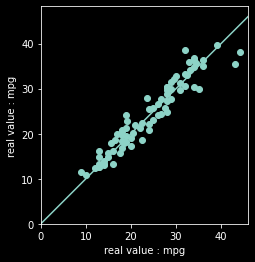

In [87]:
plt.scatter(test_labels,test_predictions)
plt.xlabel("real value : mpg")
plt.ylabel("real value : mpg")
plt.axis('equal')
plt.axis('square')

plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100,100],[-100,100])

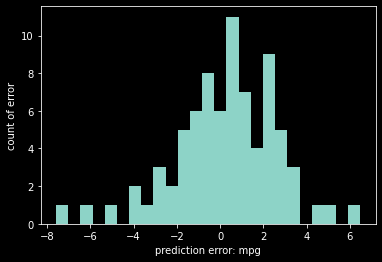

In [88]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('prediction error: mpg')
_ = plt.ylabel('count of error')